In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import noise
import model_opt
import algo_GD
import helper

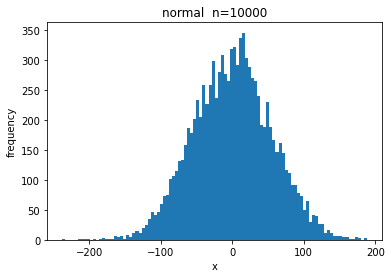

In [3]:
#正規分布
var = np.random.randint(100,200,1)[0]
noise_data = noise.Gauss(mean=0,sigma=55,dim=2,n=10000)
noise_value_gauss = noise_data.generate()

plt.hist(noise_value_gauss.T[0],bins=100)
plt.title("normal  n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()

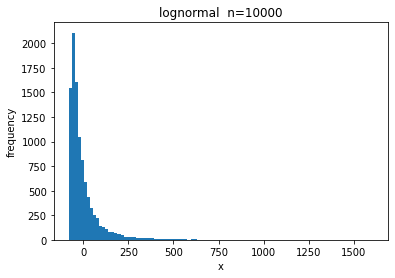

-1.3683347788173705e-13


In [4]:
#対数分布
var = np.random.randint(100,200,1)[0]
noise_data = noise.LogNormal(mean=0,sigma=1,dim=2,n=10000)
noise_value_lognormal = noise_data.generate() * 50

plt.hist(noise_value_lognormal.T[0],bins=100)
plt.title("lognormal  n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()
print(noise_value_lognormal.T[1].mean(axis=0))

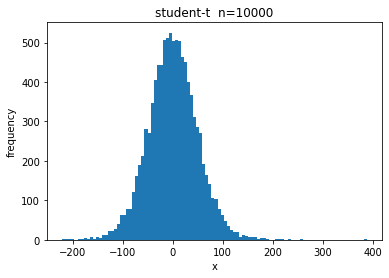

In [5]:
#student-t分布
df = 10
noise_data = noise.StudentT(dim=2,n=10000,df=df)
noise_value_student_t = noise_data.generate() * 45

plt.hist(noise_value_student_t.T[0],bins=100)
plt.title("student-t  n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()



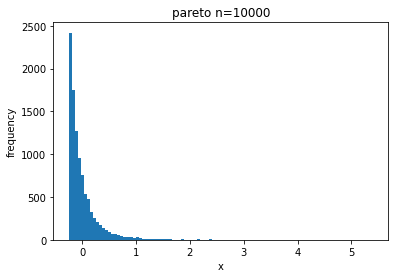

In [6]:
#パレート分布
noise_data = noise.Pareto(dim=2,n=10000,a=5)
noise_value_pareto = noise_data.generate()

plt.hist(noise_value_pareto.T[0],bins=100)
plt.title("pareto n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()

[[-13.51916008 -27.36212245]
 [-38.73324525 -30.3179937 ]
 [ 41.00796139  29.688096  ]
 ...
 [ 37.64170039  36.46521872]
 [-27.67956048 -33.70009575]
 [-28.27015854 -38.04068884]]


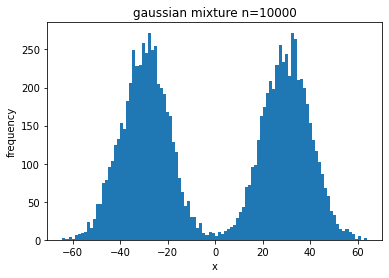

In [7]:
# 混合正規分布
noise_value_gaussian_mixture = noise.GaussianMixture(dim=2,n=10000,sigma=10,mean=30).generate()
plt.hist(noise_value_gaussian_mixture.T[0],bins=100)
plt.title("gaussian mixture n=10000")
plt.xlabel("x")
plt.ylabel("frequency")
plt.show()

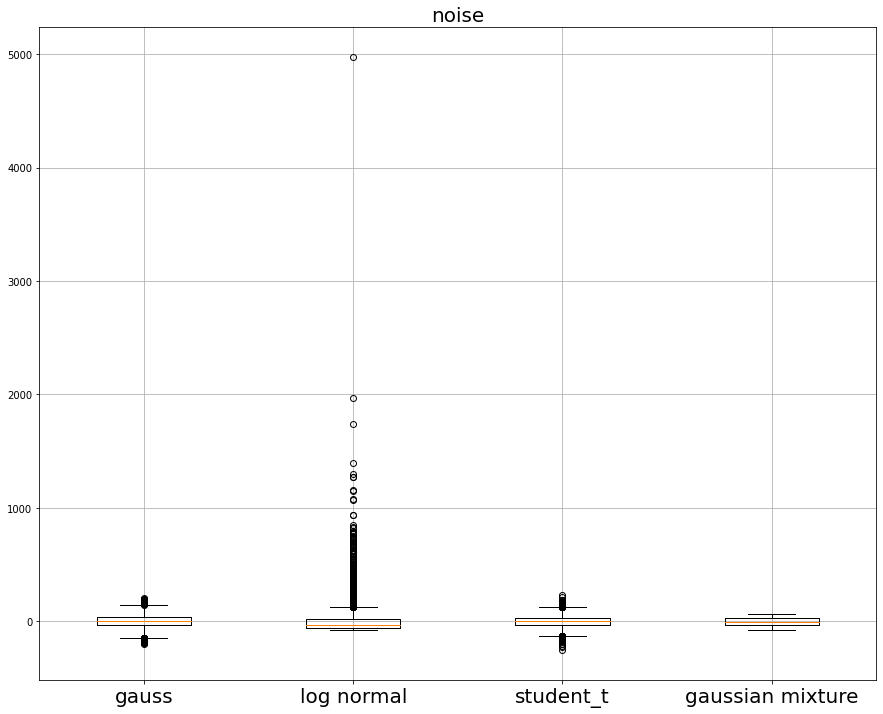

In [8]:
# 箱ひげ図
fig = plt.figure(figsize=(15.0, 12.0))
ax1 = fig.add_subplot(111)
noise_box = noise_value_gauss.T[1], noise_value_lognormal.T[1], noise_value_student_t.T[1], noise_value_gaussian_mixture.T[1]
bp1 = ax1.boxplot(noise_box)
ax1.set_xticklabels(['gauss',"log normal","student_t","gaussian mixture"],fontsize=20)
ax1.set_title('noise',fontsize=20)
ax1.grid()

plt.show()

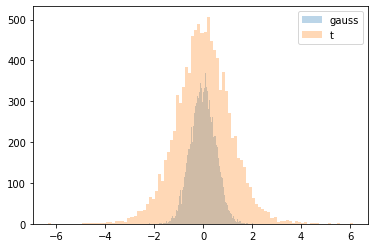

In [23]:
#正規分布+t分布

#正規分布
noise_data = noise.Gauss(mean=0,sigma=0.5,dim=2,n=10000)
noise_value_gauss = noise_data.generate()

#student-t分布
df = 10
noise_data = noise.StudentT(dim=2,n=10000,df=df)
noise_value_t = noise_data.generate()

plt.figure()
plt.hist(noise_value_gauss.T[0],bins=100, alpha=0.3,label="gauss")
plt.hist(noise_value_t.T[0],bins=100,alpha=0.3,label="t")
plt.legend()
plt.show()

In [32]:
#正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    var = 55
    noise_data = noise.Gauss(mean=0,sigma=var,dim=2,n=_t_max).generate()
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[73.75486840931012, 75.49730251383342, 74.77162839051437, 73.99865873155967, 71.52723510115715, 72.38279854381388, 71.22085659491609, 75.47884396684543, 72.05521947542866, 68.91537298421409]
[array([1.33876771, 1.68963275]), array([-1.45502094,  2.18257154]), array([-0.27476754,  0.1923538 ]), array([ 0.02607401, -0.05173683]), array([-0.70647017,  0.61739565]), array([-0.3812139,  0.0886515]), array([0.29709054, 0.1582327 ]), array([-0.7853301,  0.5447879]), array([-0.6190629 ,  0.46266328]), array([0.48798299, 0.3503763 ])]


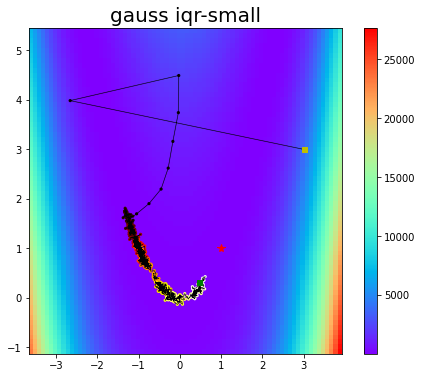

In [33]:
# 正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gauss iqr-small",fontsize=20)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [34]:
#正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []


var = 120
noise_data = noise.Gauss(mean=0,sigma=var,dim=2,n=_t_max).generate()
iqr = helper.iqr(noise_data)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
for i in algo:
    noise_value = noise_data[algo.t-1]
    f = model_opt.RosenBrock(noise_value=noise_value)
    algo.update(model=f)
last_w_store.append(algo.w)
iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[165.16965063490676]
[array([0.39432594, 0.44446169])]


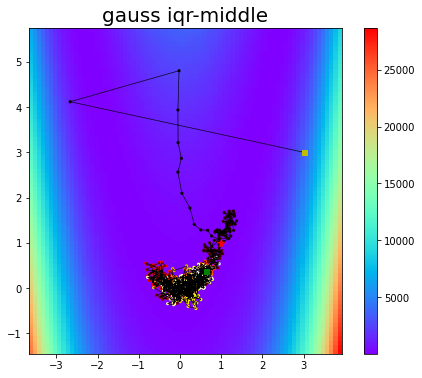

In [35]:
# 正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gauss iqr-middle",fontsize=20)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [36]:
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []


var = 210
noise_data = noise.Gauss(mean=0,sigma=var,dim=2,n=_t_max).generate()
iqr = helper.iqr(noise_data)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
for i in algo:
    noise_value = noise_data[algo.t-1]
    f = model_opt.RosenBrock(noise_value=noise_value)
    algo.update(model=f)
last_w_store.append(algo.w)
iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[281.8303474205797]
[array([ 0.49572121, -0.22827326])]


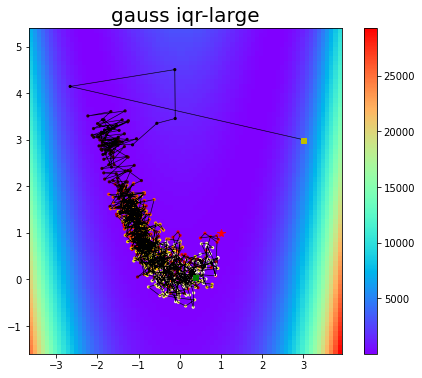

In [37]:
# 正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gauss iqr-large",fontsize=20)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [20]:
#対数分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    var = 1
    noise_data = noise.LogNormal(mean=0,sigma=var,dim=2,n=_t_max).generate() * 50
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[73.48636754509576, 72.28435958768839, 76.3780098271187, 70.18121340473377, 70.77082758154387, 74.02070335639067, 72.51944901759475, 74.1908781426014, 67.79871100783551, 70.17035625203914]
[array([0.4266242 , 0.19455379]), array([0.59570335, 0.35313597]), array([ 0.32535544, -0.00032848]), array([1.03670527, 1.24907861]), array([-0.32748832, -0.16802298]), array([1.10690506, 1.14783481]), array([-0.22674915,  0.13270559]), array([-0.1811022 ,  0.21671975]), array([-0.45081504,  0.11553868]), array([ 0.06308944, -0.15310063])]


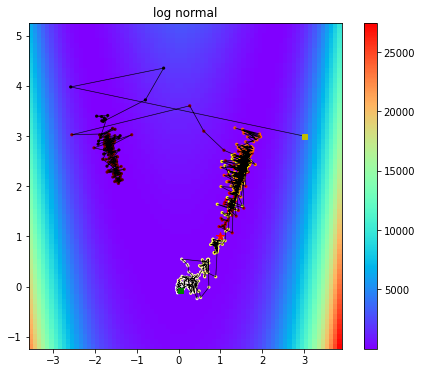

In [21]:
#lognormal
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("log normal")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [24]:
#student-t
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    df = 2
    noise_data = noise.StudentT(dim=2,n=_t_max,df=df).generate() * 45
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)
print(iqr_store)
print(last_w_store)

/Users/naoki/ML/GD/algos.py:36: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.a * newdir


[76.21602982549511, 75.71842483792238, 72.39088899053985, 72.61300020200957, 71.65770922928901, 73.95798597684546, 73.83765586196672, 70.55913824512913, 75.48933441581383, 71.61229606511634]
[array([-0.42812266,  0.07506347]), array([-0.59413365,  0.45009962]), array([-0.19111374,  0.05557515]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([-0.60517117,  0.38716551]), array([-0.84219712,  0.83974656]), array([-0.74618511,  0.73925864]), array([1.70274674, 2.59338688])]


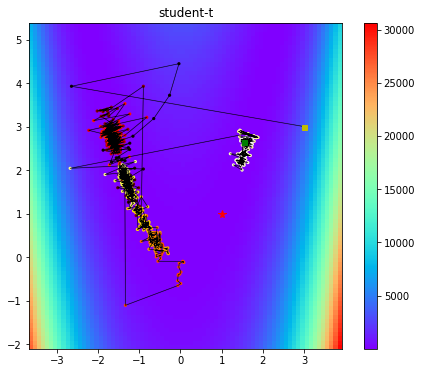

In [25]:
#student-t
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("student-t")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [47]:
# パレート分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(2):
    a = 5
    noise_data = noise.Pareto(dim=2,n=_t_max,a=a).generate() * 300
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

print(iqr_store)
print(last_w_store)

[80.74194407785838, 71.53696035536197]
[array([-0.09262968,  0.17927756]), array([-0.25375334,  0.14509861])]


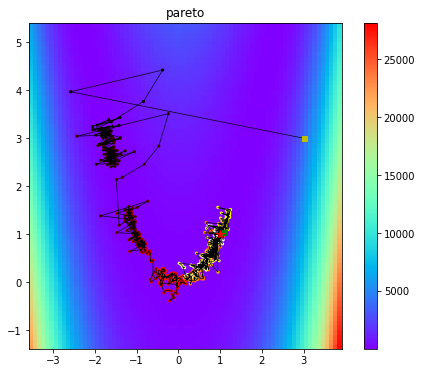

In [27]:
# パレート分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("pareto")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [26]:
#混合正規分布
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(10):
    sigma = 10
    mean = 40
    noise_data = noise.GaussianMixture(dim=2,n=_t_max,sigma=sigma,mean=mean).generate()
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)


print(iqr_store)
print(last_w_store)

[[-43.30522905 -43.45043298]
 [-44.01665731  -9.57306829]
 [ 30.99976531  40.84084464]
 ...
 [ 50.10164408  42.18654323]
 [-42.77958102 -30.92021427]
 [-24.5927514  -39.02340029]]
[-1.39976919e-15 -1.62714286e-15]
[[-55.89423119 -53.66065145]
 [-57.11124492 -31.99591499]
 [ 45.5308047   53.93339808]
 ...
 [-49.60556505 -22.30473878]
 [ 54.94443665  48.07424309]
 [-30.92424141 -50.64212087]]
[8.10018719e-16 8.66862138e-16]
[[ 24.94186931  34.98200414]
 [ 40.06354267  43.45128371]
 [-29.90067901 -41.05845659]
 ...
 [-38.9793695  -50.08134578]
 [ 31.30562281  37.85478484]
 [ 37.93286379  38.59503817]]
[-1.42108547e-15  8.31335001e-16]
[[ 53.45879247  37.386129  ]
 [-46.87261596 -38.72894692]
 [-56.3235978  -29.82900954]
 ...
 [-44.49315506 -43.21644488]
 [ 41.54898506  47.38661231]
 [ 36.73060231  40.81142127]]
[3.31823458e-15 3.89377419e-15]
[[ 42.25194055  40.86817628]
 [ 47.19680636  37.74603891]
 [ 50.78715419  38.6856666 ]
 ...
 [-40.82177249 -35.06936496]
 [-55.80992243 -45.18399059

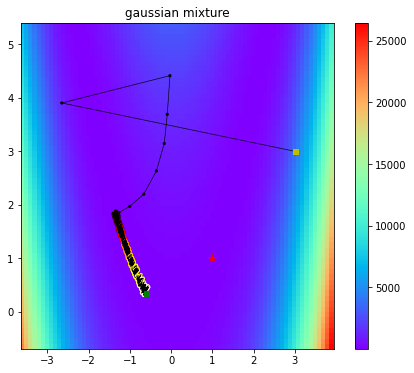

In [27]:
# 混合正規分布
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)
axes.set_title("gaussian mixture")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()



[[ 55.22795558  57.47076757]
 [-64.97495882 -18.04376274]
 [-54.21389881 -31.21388001]
 ...
 [ 24.70762716  49.7067061 ]
 [ 54.56947773  13.55090794]
 [ 74.18564033  37.63087494]]
